# Indian Startup using classification technique

#### Importing librarys 

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading start up funding cvs file (the data is from 2015 to 2017)

In [75]:
data = pd.read_csv("startup_funding.csv")

#### Sample of our dataset

In [76]:
# checking data, display first four rows of dataframe
data.head(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [77]:
data.tail(4) #display last 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [78]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [79]:
print('Rows {rows} and Columns {columns}'.format(rows=data.shape[0],columns=data.shape[1]))

Rows 2372 and Columns 10


### Data clean up for Analysis (filling missing values)

#### Identifying the missing vales in data

In [80]:
missing_values_count = data.isnull().sum()

In [81]:
missing_values_count[0:10]

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

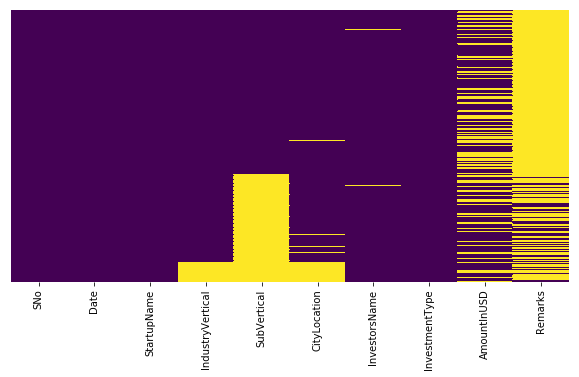

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Creating a copy to update the dataset 

In [83]:
newdata=data.copy()

#### Formating and filling in missing values in AmountInUSD

AmountInUSD is not in integer, it has ','. So we will remove ',' and format into integer using regular expressions

In [84]:
import re;
def replace_comma_with_emptySpace(x):
    if re.search(',',x): 
        return (x.replace(',',''))
    return x
newdata['AmountInUSD']=newdata[newdata['AmountInUSD'].notnull()]['AmountInUSD'].apply(replace_comma_with_emptySpace).astype('int')

In [85]:
newdata['AmountInUSD']=round(newdata['AmountInUSD'].fillna(0))

#### Formatting and filling in city location

In [86]:
newdata['CityLocation']=newdata['CityLocation'].fillna(value='NotSpecified')

In [88]:
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()
    if   re.search('/',x):
        return x.split('/')[0].strip()
    else :
        return x.strip()
newdata['CityLocation']=newdata['CityLocation'].apply(convert_Slash)

#### Formatting Date

In [89]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):
        return x.replace('.','')
    return x
newdata['Date']=newdata['Date'].apply(rem_err_date)
newdata['Date'].replace('12/052015','12/05/2015',inplace=True)
newdata['Date'].replace('15/012015','15/01/2015',inplace=True)
newdata['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdata['Date'].replace('13/042015','13/04/2015',inplace=True)

#### Formatting Inverstment type

In [90]:
newdata['InvestmentType'].value_counts().index

Index(['Seed Funding', 'Private Equity', 'SeedFunding', 'Debt Funding',
       'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype='object')

In [91]:
newdata['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

In [92]:
newdata['InvestmentType']= [x.replace(' ', '').lower() for x in newdata['InvestmentType']]

In [93]:
newdata['InvestmentType'].value_counts().index

Index(['seedfunding', 'privateequity', 'crowdfunding', 'debtfunding'], dtype='object')

#### Fill in missing IndustryVertical

In [94]:
newdata['IndustryVertical']=newdata['IndustryVertical'].fillna(value='Other')

#### Fill in missing SubVertical

In [95]:
newdata['SubVertical']=newdata['SubVertical'].fillna(value='Other')

#### Fill in missing InvestorsName

In [96]:
newdata['InvestorsName']=newdata['InvestorsName'].fillna(value='Unknown')

#### Deleting unwanted column remarks

In [97]:
del newdata['Remarks']

Analysis of data after clean up

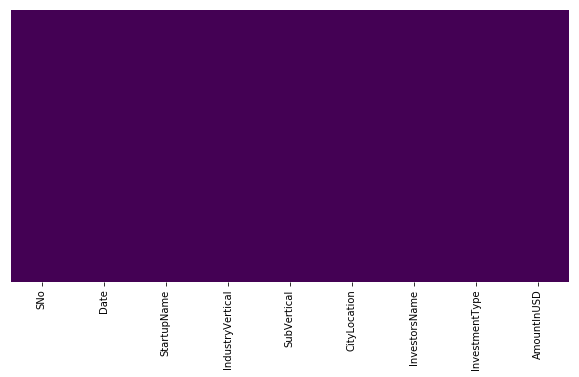

In [98]:
plt.figure(figsize=(10,5))
sns.heatmap(newdata.isnull(),cmap='viridis',yticklabels=False,cbar=False)

## Data exploration

In [99]:
newdata['Date'] = pd.to_datetime(newdata['Date'], format='%d/%m/%Y')
newdata['YrMo'] = [str(x.year) + '-' + str(x.month).zfill(2) for x in newdata['Date']]

[Text(0.5,0,'Investment Count'), Text(0.5,1,'# of Startup Investments ($>0)')]

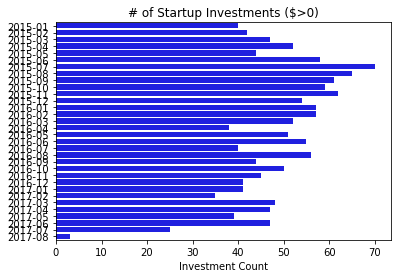

In [100]:
PosFund_df = newdata.loc[newdata['AmountInUSD'] > 0,['YrMo','AmountInUSD']]
fundCountsByMo = PosFund_df['YrMo'].value_counts()
FundCounts_df = pd.DataFrame(fundCountsByMo).sort_index()
ax = sns.barplot(FundCounts_df.YrMo, FundCounts_df.index, orient="h", color='b')
ax.set(xlabel='Investment Count', title='# of Startup Investments ($>0)')
#sns.plt.show()

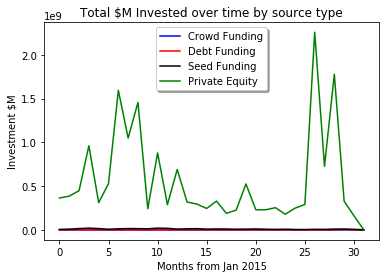

In [101]:
#Make df such there's an entry for each investment type
FundTotal_df = pd.pivot_table(newdata,index=['YrMo'],values=['AmountInUSD'],columns=['InvestmentType'], aggfunc=np.sum, fill_value=0)['AmountInUSD'].reset_index()

fig, ax = plt.subplots()
ax.plot(FundTotal_df['crowdfunding'], 'b', label='Crowd Funding')
ax.plot(FundTotal_df['debtfunding'], 'r', label='Debt Funding')
ax.plot(FundTotal_df['seedfunding'], 'k', label='Seed Funding')
ax.plot(FundTotal_df['privateequity'], 'g', label='Private Equity')
ax.set(xlabel='Months from Jan 2015', ylabel='Investment $M', title='Total $M Invested over time by source type')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()



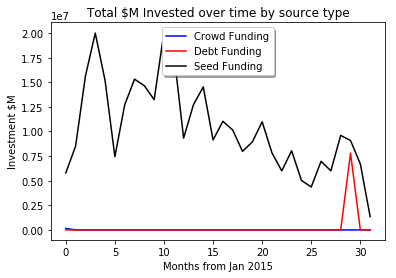

In [102]:
fig,ax = plt.subplots()
ax.plot(FundTotal_df['crowdfunding'], 'b', label='Crowd Funding')
ax.plot(FundTotal_df['debtfunding'], 'r', label='Debt Funding')
ax.plot(FundTotal_df['seedfunding'], 'k', label='Seed Funding')
ax.set(xlabel='Months from Jan 2015', ylabel='Investment $M', title='Total $M Invested over time by source type')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()

# Feature engineering

We don't need SNo, startup name and remarks columns for our project, so we are deleting them

In [103]:
del newdata['SNo']
del newdata['StartupName']

As various startups have multiple number of investors, we will have no of investors as seperate column 

In [104]:
def calculate_n_investors(x):
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdata['NumberOfInvestors']=newdata['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)

In [105]:
newdata['Year'] = [str(x.year) for x in newdata['Date']]

In [106]:
newdata['Month'] = [str(x.month) for x in newdata['Date']]

In [107]:
newdata = pd.get_dummies(newdata, columns=['InvestmentType'], prefix = ['InvestmentType'])

# Feature selection

In [108]:
newdata['AmountGreaterThanMillion'] = newdata['AmountInUSD'].apply(lambda x: 1 if x >= 1000000 else 0)
label = newdata['AmountGreaterThanMillion']

features = newdata.drop(['AmountInUSD', 'Date', 'InvestorsName', 'SubVertical', 'YrMo'], axis=1)
#label_small = label.iloc[:1435]
#features_small = features.iloc[:1435]
features = pd.get_dummies(features, columns=['IndustryVertical'], prefix = ['IndustryVertical'])
features = pd.get_dummies(features, columns=['CityLocation'], prefix = ['CityLocation'])

In [109]:
newdata.head()

,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,AmountInUSD,YrMo,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding,AmountGreaterThanMillion
0,2017-08-01,Technology,Predictive Care Platform,bangalore,Kae Capital,1300000.0,2017-08,1,2017,8,0,0,1,0,1
1,2017-08-02,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,0.0,2017-08,1,2017,8,0,0,1,0,0
2,2017-08-02,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",0.0,2017-08,7,2017,8,0,0,0,1,0
3,2017-08-02,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",500000.0,2017-08,4,2017,8,0,0,0,1,0
4,2017-08-02,Consumer Internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",850000.0,2017-08,2,2017,8,0,0,0,1,0


In [110]:
features.tail(4)

,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding,AmountGreaterThanMillion,IndustryVertical_360-degree view creating platform,IndustryVertical_3D Printer Manufacturer,...,CityLocation_siliguri,CityLocation_singapore,CityLocation_surat,CityLocation_trivandrum,CityLocation_udaipur,CityLocation_udupi,CityLocation_us,CityLocation_usa,CityLocation_vadodara,CityLocation_varanasi
2368,1,2015,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2369,2,2015,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2370,1,2015,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2371,1,2015,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
label.tail(4)

2368    0
2369    1
2370    0
2371    0
Name: AmountGreaterThanMillion, dtype: int64

# Modelling

In [112]:
from sklearn.svm import LinearSVC
# LinearSVC model applied with simple feature engineering 
svc_clf_1 = LinearSVC()
svc_clf_1.fit(features, label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_clf_1, features, label, cv=3, scoring="accuracy")

array([0.62326169, 0.62326169, 0.62278481])

In [114]:
from sklearn.svm import SVC
svc_clf_2 = SVC()
svc_clf_2.fit(features, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
cross_val_score(svc_clf_2, features, label, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [116]:
# using kernel = polynomial
svc_clf_3 = SVC(kernel='poly', degree=2)
svc_clf_3.fit(features, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
cross_val_score(svc_clf_3, features, label, cv=3, scoring="accuracy")

array([1., 1., 1.])

# Using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [129]:
svc_params = [
   { 'C': [0.001, 0.01, 0.1, 1, 5, 10], 
     'gamma' : [0.001, 0.01, 0.1],
   },
]
clf = GridSearchCV(svc_clf_3, svc_params, cv=5)
clf.fit(features_small, label_small)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10], 'gamma': [0.001, 0.01, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
#You can access the best score and the best model from the grid search: 
print("Best score: {}".format(clf.best_score_))
print("Optimal params: {}".format(clf.best_estimator_))

Best score: 1.0
Optimal params: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Random forest classifier

In [120]:
# random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forrest_params = dict(
   max_depth = [n for n in range(9, 14)],
   min_samples_split = [n for n in range(4, 11)],
   min_samples_leaf = [n for n in range(2, 5)],
   n_estimators = [n for n in range(10, 60, 10)],
)
rclf = RandomForestClassifier(n_estimators=10, max_depth=9,random_state=0)
rclf.fit(features, label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [121]:
cross_val_score(rclf, features, label, cv=3, scoring="accuracy")

array([0.92793932, 0.83059418, 0.93924051])

# Using Decission Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
features_small = features.iloc[:500]
label_small = label.iloc[:500]

In [135]:
dt = DecisionTreeClassifier()
dt.fit(features_small, label_small)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
# Fine tuning hyper-parameters with GridSearchCV
dt_params = [
   { 'max_depth': [1, 2, 4, 8, 16, 32, 64], 
     'min_samples_leaf' : [1, 2, 3, 4, 5, 6],
   }
]

In [138]:
dt_cv = GridSearchCV(estimator=dt, param_grid=dt_params, cv=4)
dt_cv.fit(features, label)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 4, 8, 16, 32, 64], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
cross_val_score(dt_cv, features_small, label_small, cv=3, scoring="accuracy")

array([1., 1., 1.])

# Ada Boost Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier
bdt_clf = AdaBoostClassifier(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))
bdt_clf.fit(features, label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [128]:
cross_val_score(bdt_clf, features_small, label_small, cv=3, scoring="precision")

array([1., 1., 1.])